# Multipe Regression

In this notebook we will learn the respective steps needed to compute Simple Linear Regression with data on house sales in King County, USA (https://www.kingcounty.gov) to predict house prices. You will:
* Upload and preprocess the data
* Write a function to compute the Multiple Regression weights
* Write a function to make predictions of the output given the input feature
* Compare different models for predicting house prices

# Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Upload, preprocess and check the data

Dataset is from house sales in King County, USA (https://www.kingcounty.gov).

In [2]:
# Import dataset
sales = pd.read_csv('housing.csv')

# Look at the table to check potential features
sales[:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
# Check if the dataset contains NaN values
sales.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [4]:
# Check some statistics of the data
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


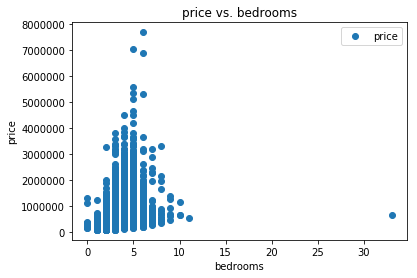

In [5]:
# Plot some feature relations
sales.plot(x='bedrooms', y='price', style='o')
plt.title('price vs. bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

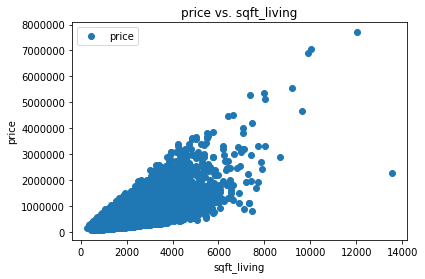

In [6]:
# Plot some feature relations
sales.plot(x='sqft_living', y='price', style='o')
plt.title('price vs. sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [7]:
# Divide the data into some 'attributes' (X) and 'labels' (y).
X = sales[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = sales['price']

# Split data into training and testing

In [8]:
# Split data set into 80% train and 20% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Look at the shape to check the split ratio
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 5), (4323, 5), (17290,), (4323,))

# Use a pre-build multiple regression function 



In [9]:
# Train a Sklearn built-in function
reg = LinearRegression()
reg.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'], dtype='object')

In [11]:
# See intercept and coefficients chosen by the model
print('Intercept:', reg.intercept_)
coeff_df = pd.DataFrame({'Features': X.columns, 'Coefficients': reg.coef_}).set_index('Features')
coeff_df

Intercept: 71231.9724665879


,Coefficients
Features,
bedrooms,-58230.081373
bathrooms,4992.331205
sqft_living,318.086037
sqft_lot,-0.371746
floors,466.551879


In [12]:
# Do prediction on test data
y_pred = reg.predict(X_test)

In [13]:
# Check differences between actual and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_pred - y_test},
                   columns=['Actual', 'Predicted', 'Difference']).astype(int)
df.head()

,Actual,Predicted,Difference
17384,297000,417909,120909
722,1578000,1321661,-256338
2680,562100,415651,-146448
18754,631500,318686,-312813
14554,780000,859669,79669


In [14]:
# Evaluate the performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 167294.67988855802
Mean Squared Error: 59742013410.60531
Root Mean Squared Error: 244421.79405815125


# For more information on performance evaluation see also
* https://en.wikipedia.org/wiki/Mean_absolute_error
* https://en.wikipedia.org/wiki/Mean_squared_error
* https://en.wikipedia.org/wiki/Root-mean-square_deviation